In [ ]:
#Setup!
!pip3 install torch torchvision torchaudio
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install kaggle
%matplotlib inline
from fastai.vision.all import *
from fastai.callback.fp16 import *
from pathlib import Path

In [ ]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/MyDrive/Colab_Dataset/Marine_Fouling'

Mounted at /content/gdrive


# MarineFouling / "begroing"

In [ ]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2,seed=42, \
                                   item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75), \
                                   bs=64,shuffle_train=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


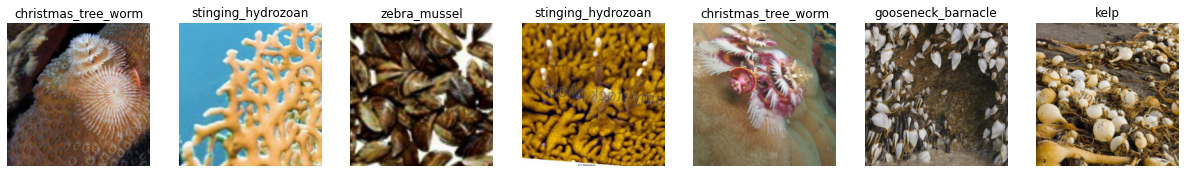

In [ ]:
# Check out some of the images in a batch
dls.show_batch(nrows=1, ncols=7)

In [ ]:
dls.train_ds.items[:1000]

In [ ]:
# training
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5, base_lr=5.75e-03)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.964235,0.682720,0.186312,06:49


epoch,train_loss,valid_loss,error_rate,time
0,0.631282,0.484564,0.148289,00:35
1,0.491066,0.814715,0.148289,00:34
2,0.402338,0.716581,0.163498,00:33
3,0.303396,0.387372,0.106464,00:35
4,0.234130,0.354440,0.095057,00:34


In [ ]:
# Check the species that the model confuses most often.
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=3)

[('algae', 'kelp', 5),
 ('kelp', 'algae', 3),
 ('stinging_hydrozoan', 'algae', 3)]

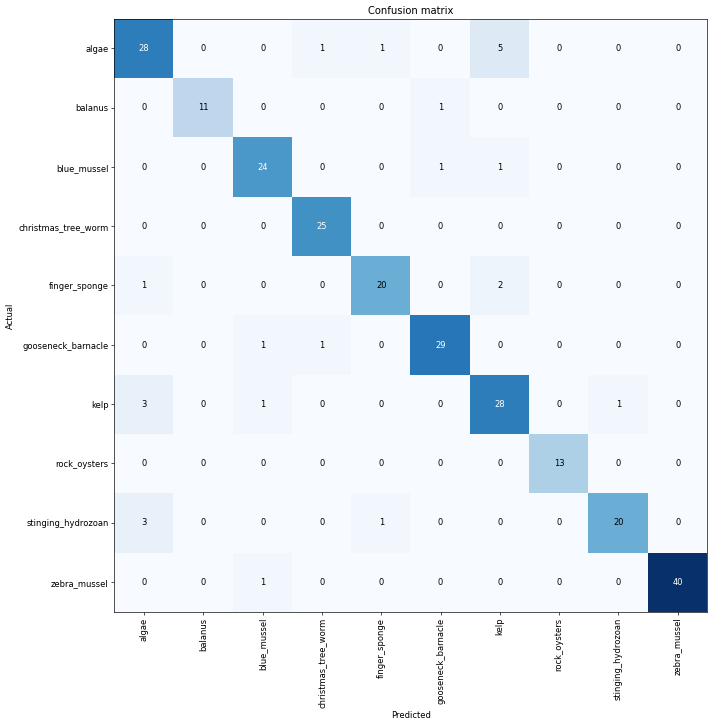

In [ ]:
# confuse matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

Todo:

1. plotte feilkvalviserte losses. plot_top_losses
2. deployment. Bruk voila + binder

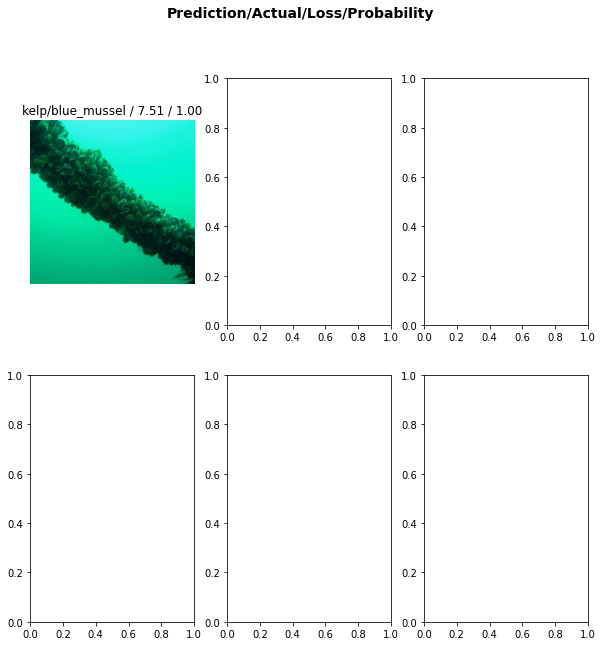

In [ ]:
interp.plot_top_losses(6, figsize=(10,10))

## Export model

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#0) []